In [2]:
import openeo
import numpy as np
import matplotlib.pyplot as plt
import imageio
import rasterio
from rasterio.plot import show
import seaborn as sns
import xarray

In [6]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu/openeo/1.2").authenticate_oidc()

Authenticated using refresh token.


In [7]:
datacube = connection.load_collection("SENTINEL2_L2A", \
        spatial_extent={"west": 13.10, "south": 52.37, "east": 13.66, "north": 52.64}, \
        temporal_extent=["2024-05-15", "2024-05-17"], \
        bands=["B04", "B03", "B02"]
        )

In [8]:
result = datacube.download("load-raw.nc")

In [9]:
ds = xarray.load_dataset("load-raw.nc")
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

In [24]:
print(data.max().item())
print(data.min().item())

17544.0
-999.0


/home/radtklau/anaconda3/envs/amls-project/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


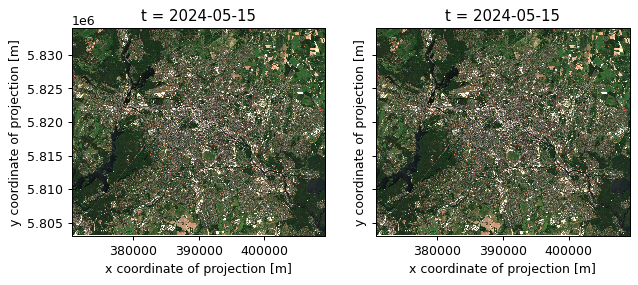

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1])